In [0]:
!rm -r data/

In [0]:
base_dir = 'drive/ell409/src'

import os
os.chdir(base_dir)

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from sklearn.decomposition import PCA
# from PCA import PCA
import kmeans

%matplotlib inline

In [0]:
data_dir = '../data/fashion_mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [4]:
X_train, Y_train = du.load_fashion_mnist(data_dir + 'train')
X_test, Y_test = du.load_fashion_mnist(data_dir + 't10k')

X_train = du.normalize2(X_train)
X_test = du.normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [0]:
# Visualization of One Image

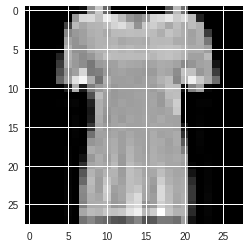

In [6]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

In [0]:
# PCA (n_components = 25)

(60000, 25)
(10000, 25)
0.7204614014320665


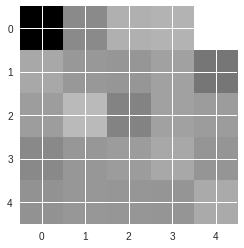

In [8]:
pca = PCA(n_components=25)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

# Print reduced image
plt.imshow(np.reshape(X_train_reduced_1[10], (-1, 5)))
plt.gray()

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)
print(np.sum(pca.explained_variance_ratio_))

In [0]:
# Supervised Learning

## Bayes Classifier

### Training and Parameter Tuning

#### Class Conditional Distribution - (GMM - components = 1)

In [20]:
parameters = [1, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

Class 0
Converged after 2 iterations
Class 1
Converged after 2 iterations
Class 2
Converged after 2 iterations
Class 3
Converged after 2 iterations
Class 4
Converged after 2 iterations
Class 5
Converged after 2 iterations
Class 6
Converged after 2 iterations
Class 7
Converged after 2 iterations
Class 8
Converged after 2 iterations
Class 9
Converged after 2 iterations


In [21]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.8064
Precision per Class
[0.7584 0.9812 0.719  0.7651 0.6012 0.9508 0.5558 0.8391 0.92   0.9515]
Recall per Class
[0.788 0.942 0.701 0.85  0.817 0.889 0.294 0.949 0.931 0.903]
F1 Score per Class
[0.7729 0.9612 0.7099 0.8053 0.6927 0.9189 0.3846 0.8907 0.9254 0.9266]
Macro Average Precision, Recall and F1 Score
[0.8042 0.8064 0.8053]
Micro Average Precision, Recall and F1 Score
[0.8064 0.8064 0.8064]




In [22]:
#### Class Conditional Density (GMM - Components = 2)

parameters = [2, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)



Class 0
Didn't converge, ran for 10 iterations
Class 1
Didn't converge, ran for 10 iterations
Class 2
Didn't converge, ran for 10 iterations
Class 3
Didn't converge, ran for 10 iterations
Class 4
Didn't converge, ran for 10 iterations
Class 5
Didn't converge, ran for 10 iterations
Class 6
Didn't converge, ran for 10 iterations
Class 7
Didn't converge, ran for 10 iterations
Class 8
Didn't converge, ran for 10 iterations
Class 9
Didn't converge, ran for 10 iterations


In [24]:
### Testing

Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

Accuracy on Test Set =  0.8194
Precision per Class
[0.7468 0.9767 0.7291 0.7926 0.6332 0.9502 0.5927 0.8582 0.9383 0.9464]
Recall per Class
[0.808 0.963 0.732 0.856 0.782 0.916 0.355 0.938 0.943 0.901]
F1 Score per Class
[0.7762 0.9698 0.7305 0.8231 0.6998 0.9328 0.444  0.8963 0.9406 0.9232]
Macro Average Precision, Recall and F1 Score
[0.8164 0.8194 0.8179]
Micro Average Precision, Recall and F1 Score
[0.8194 0.8194 0.8194]




In [10]:
# (no. of neighbours, minkowski parameter) 
knn_parameters = [(5, 1),
                  (5, 2), 
                  (10, 2),
                  (5, np.inf),
                  (5, -np.inf)]

    
for k1,p1 in knn_parameters:
    model = knn.knn_model(k = k1, p = p1)
    model.train(X_train_reduced_1, Y_train)
    Y_pred = model.predict(X_test_reduced_1)
    
    print("Number of Neighbours = %s , Minkowski Parameter = %s" % (str(k1), str(p1)))
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 10))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 10))
    
    print()
    print()

Number of Neighbours = 5 , Minkowski Parameter = 1
Accuracy on Dev Set =  0.8568
Precision per Class
[0.7844 0.9848 0.7313 0.8926 0.7365 0.9813 0.6947 0.8967 0.9569 0.9085]
Recall per Class
[0.837 0.97  0.784 0.864 0.791 0.894 0.562 0.937 0.976 0.953]
F1 Score per Class
[0.8099 0.9773 0.7568 0.878  0.7628 0.9356 0.6213 0.9164 0.9663 0.9302]
Macro Average Precision, Recall and F1 Score
[0.8568 0.8568 0.8568]
Micro Average Precision, Recall and F1 Score
[0.8568 0.8568 0.8568]


Number of Neighbours = 5 , Minkowski Parameter = 2
Accuracy on Dev Set =  0.8576
Precision per Class
[0.7869 0.9837 0.7335 0.8923 0.7341 0.9794 0.7    0.8976 0.9529 0.9144]
Recall per Class
[0.838 0.968 0.787 0.87  0.784 0.902 0.567 0.938 0.971 0.951]
F1 Score per Class
[0.8116 0.9758 0.7593 0.881  0.7582 0.9391 0.6265 0.9174 0.9619 0.9324]
Macro Average Precision, Recall and F1 Score
[0.8575 0.8576 0.8575]
Micro Average Precision, Recall and F1 Score
[0.8576 0.8576 0.8576]


Number of Neighbours = 10 , Minkowski 

In [12]:
import gc
gc.collect()

4988